# Random Forest Model

RF model to be used for predicting protein coding genes in DNA sequences.

**Random Search with CV**
- bootstrap': False
- max_depth': 20
- max_features': 'auto'
- min_samples_leaf': 1
- min_samples_split': 2
- n_estimators': 1000
 
**Grid Search with CV**
- bootstrap': False
- max_depth': 40
- max_features': 3
- min_samples_leaf': 1
- min_samples_split': 2
- n_estimators': 2000

BEST MODEL:
- Random Search with CV - BUT
- n_estimators': 200
- n_features: 200

## Imports

In [ ]:
G7 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G7.features.csv').iloc[: , 1:]
G8 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G8.features.csv').iloc[: , 1:]
G9 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G9.features.csv').iloc[: , 1:]
G10 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G10.features.csv').iloc[: , 1:]
G11 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G11.features.csv').iloc[: , 1:]
G12 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G12.features.csv').iloc[: , 1:]
G13 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G13.features.csv').iloc[: , 1:]
G14 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G14.features.csv').iloc[: , 1:]
G15 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G15.features.csv').iloc[: , 1:]

In [ ]:
G1 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G1.features.csv').iloc[: , 1:]

In [ ]:
G2 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G2.features.csv').iloc[: , 1:]

In [ ]:
G3 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G3.features.csv').iloc[: , 1:]

In [ ]:
G5 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G5.features.csv').iloc[: , 1:]

In [ ]:
G6 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G6.features.csv').iloc[: , 1:]

## Multiple genomes at a time

In [ ]:
#frames = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, G11, G12, G13, G14, G15]
frames = [G1, G2, G3, G4, G5]

df = pd.concat(frames)
df = df.iloc[: , 1:]

In [ ]:
df.tail(10)

## 1 genome at a time

In [1]:
# Importing data
import pandas as pd
import time

# Preprocessing and encoding variables
import numpy as np
from sklearn import preprocessing

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Visualising feature importance and making plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, roc_auc_score

In [2]:
G4 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G4.features.csv').iloc[: , 1:]

In [48]:
G = G4
G.tail(5)

,Type,Length,Dataset,Genome,GC_content,GC1_content,GC2_content,GC3_content,Start_ATG,Start_GTG,...,c_weight_TCG,c_weight_TCT,c_weight_TGA,c_weight_TGC,c_weight_TGG,c_weight_TGT,c_weight_TTA,c_weight_TTC,c_weight_TTG,c_weight_TTT
9093,CDS,5862,1,Listeria monocytogenes,0.573524,0.569601,0.460594,0.690379,1,0,...,0.093168,0.093168,0.0,0.750000,1,0.250000,0.045045,0.558824,0.054054,0.441176
9094,CDS,6120,1,Listeria monocytogenes,0.580719,0.565686,0.500490,0.675980,0,1,...,0.152381,0.052381,0.0,1.000000,1,0.000000,0.054054,0.382353,0.037838,0.617647
9095,CDS,7308,1,Listeria monocytogenes,0.587302,0.552545,0.500821,0.708539,0,1,...,0.186916,0.042056,0.0,0.708333,1,0.291667,0.091429,0.365385,0.108571,0.634615
9096,LORF,11475,1,Listeria monocytogenes,0.585098,0.569935,0.531242,0.654118,1,0,...,0.106796,0.032362,1.0,0.000000,1,0.000000,0.073529,0.379310,0.069853,0.620690
9097,CDS,16680,1,Listeria monocytogenes,0.484592,0.535971,0.422842,0.494964,1,0,...,0.098485,0.171717,0.0,0.000000,1,0.000000,0.196319,0.339869,0.131902,0.660131


In [49]:
G = G.dropna()

In [50]:
print('The shape of our dataframe is:', G.shape)

The shape of our dataframe is: (9098, 14791)


### Separate out unwanted data based on column 'Dataset'

In [6]:
#G = G.loc[G['Dataset'] == 1]

In [7]:
#print('The shape of our dataframe is:', G.shape)

The shape of our dataframe is: (6646, 14791)


## Pre-processing / Data preparation

1. One-hot encoded categorical variables
2. Split data into features and labels
3. Convert to arrays
4. Split data into training and testing sets

### Encoding target values

In [51]:
def encode_feature(array):
    """ Encode a categorical array into a number array
    
    :param array: array to be encoded
    :return: numerical array
    """
  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)

In [52]:
class_names = ['CDS', 'LORF']
targets = G["Type"].values
print(targets)

['CDS' 'LORF' 'LORF' ... 'CDS' 'LORF' 'CDS']


In [53]:
targets = encode_feature(targets)
print(targets)

[0 1 1 ... 0 1 0]


In [54]:
print('The shape of our dataframe is:', G.shape)
print('Rows:', G.shape[0])
print('Columns:', G.shape[1])

The shape of our dataframe is: (9098, 14791)
Rows: 9098
Columns: 14791


### Selecting features and targets and converting data to arrays

In [55]:
# Labels are the values we want to predict
labels = targets

# Remove the labels from the features -> axis 1 refers to the columns
features = G.drop(['Type','Genome', 'Dataset'], axis = 1)

# Saving feature names as list for later use
feature_names = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [56]:
print('The shape of our features are:', features.shape)

The shape of our features are: (9098, 14788)


### Split into training and testing sets

In [57]:
# Split the data into training and testing sets -> x = features and y = labels/targets
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [58]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (6823, 14788)
Training Labels Shape: (6823,)
Testing Features Shape: (2275, 14788)
Testing Labels Shape: (2275,)


## Train model - default Rand Forest

**RandomForestClassifier**(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(random_state = 42, n_jobs=-1)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_x, train_y)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Make predictions on test set

In [47]:
pred_y = clf.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

Accuracy: 0.8038507821901324


## Train model - best params RandomSearch

In [59]:
# Create a Gaussian Classifier
clf_rand = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                             max_depth=20, bootstrap=False, random_state = 42)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_rand.fit(train_x, train_y)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

## Make predictions on test set

In [60]:
pred_y = clf_rand.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
print("Precision score:", metrics.precision_score(test_y, pred_y))
print("Recall score:", metrics.recall_score(test_y, pred_y))
print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.810989010989011
Precision score: 0.7875
Recall score: 0.84375
ROC_AUC score: 0.8114853896103896


## Confusion matrix

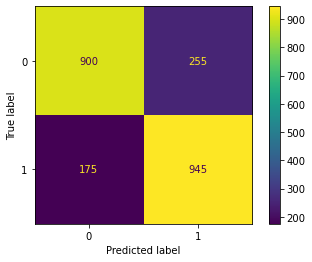

In [61]:
plot_confusion_matrix(clf_rand, test_x, test_y)  
plt.show()

#plt.savefig('confmatrix_g1_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

## Finding important features

1. Create a random forests model.
2. Use the feature importance variable to see feature importance scores.
3. Visualize these scores using the seaborn library.

In [62]:
# Get numerical feature importances
importances = list(clf_rand.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Length               Importance: 0.07689
Variable: 1_aa_mer_R           Importance: 0.01021
Variable: GC2_content          Importance: 0.00839
Variable: Start_ATG            Importance: 0.00821
Variable: 2_aa_mer_LG          Importance: 0.00817
Variable: 1_aa_mer_E           Importance: 0.00778
Variable: 2_aa_mer_EL          Importance: 0.00761
Variable: c_weight_GAG         Importance: 0.00739
Variable: 2_aa_mer_LE          Importance: 0.00736
Variable: 2_aa_mer_LD          Importance: 0.00674
Variable: c_weight_TAT         Importance: 0.0058
Variable: 3_mer_CCA            Importance: 0.00551
Variable: 4_mer_TGAA           Importance: 0.00549
Variable: c_weight_GAT         Importance: 0.00538
Variable: 5_mer_GAAAA          Importance: 0.00502
Variable: c_weight_ATT         Importance: 0.00491
Variable: 5_mer_TGAAG          Importance: 0.00483
Variable: 5_mer_TGAAA          Importance: 0.00476
Variable: 2_aa_mer_RR          Importance: 0.00467
Variable: 5_mer_TTGAA          I

Variable: 2_aa_mer_SP          Importance: 0.00017
Variable: c_weight_CGA         Importance: 0.00017
Variable: 4_mer_AATA           Importance: 0.00016
Variable: 4_mer_ACAG           Importance: 0.00016
Variable: 4_mer_ACGC           Importance: 0.00016
Variable: 4_mer_ACGT           Importance: 0.00016
Variable: 4_mer_CACA           Importance: 0.00016
Variable: 4_mer_CACC           Importance: 0.00016
Variable: 4_mer_CCTC           Importance: 0.00016
Variable: 4_mer_CGAT           Importance: 0.00016
Variable: 4_mer_CGGT           Importance: 0.00016
Variable: 4_mer_CGTG           Importance: 0.00016
Variable: 4_mer_GACT           Importance: 0.00016
Variable: 4_mer_GATC           Importance: 0.00016
Variable: 4_mer_GGCT           Importance: 0.00016
Variable: 4_mer_GTTG           Importance: 0.00016
Variable: 4_mer_TAAT           Importance: 0.00016
Variable: 5_mer_AACAA          Importance: 0.00016
Variable: 5_mer_AAGTG          Importance: 0.00016
Variable: 5_mer_CCGCT          

Variable: 6_mer_GTTGAA         Importance: 0.0001
Variable: 6_mer_TGAAGC         Importance: 0.0001
Variable: 6_mer_TGGCCG         Importance: 0.0001
Variable: 6_mer_TTAAAG         Importance: 0.0001
Variable: 6_mer_TTATCG         Importance: 0.0001
Variable: 2_aa_mer_AN          Importance: 0.0001
Variable: 2_aa_mer_DM          Importance: 0.0001
Variable: 2_aa_mer_FY          Importance: 0.0001
Variable: 2_aa_mer_GW          Importance: 0.0001
Variable: 2_aa_mer_IH          Importance: 0.0001
Variable: 2_aa_mer_KN          Importance: 0.0001
Variable: 2_aa_mer_KQ          Importance: 0.0001
Variable: 2_aa_mer_KS          Importance: 0.0001
Variable: 2_aa_mer_LH          Importance: 0.0001
Variable: 2_aa_mer_LW          Importance: 0.0001
Variable: 2_aa_mer_MA          Importance: 0.0001
Variable: 2_aa_mer_MD          Importance: 0.0001
Variable: 2_aa_mer_MK          Importance: 0.0001
Variable: 2_aa_mer_NS          Importance: 0.0001
Variable: 2_aa_mer_PD          Importance: 0.0001


Variable: 6_mer_AAGCTG         Importance: 7e-05
Variable: 6_mer_AATGAT         Importance: 7e-05
Variable: 6_mer_AATGCA         Importance: 7e-05
Variable: 6_mer_AATGGC         Importance: 7e-05
Variable: 6_mer_AATTAC         Importance: 7e-05
Variable: 6_mer_ACCAGC         Importance: 7e-05
Variable: 6_mer_AGCAGG         Importance: 7e-05
Variable: 6_mer_AGCTGG         Importance: 7e-05
Variable: 6_mer_AGGAAG         Importance: 7e-05
Variable: 6_mer_AGGATG         Importance: 7e-05
Variable: 6_mer_AGGCGA         Importance: 7e-05
Variable: 6_mer_ATCAAA         Importance: 7e-05
Variable: 6_mer_ATCTGA         Importance: 7e-05
Variable: 6_mer_ATGATT         Importance: 7e-05
Variable: 6_mer_ATGCCG         Importance: 7e-05
Variable: 6_mer_ATGCTG         Importance: 7e-05
Variable: 6_mer_ATGGAT         Importance: 7e-05
Variable: 6_mer_ATGGCT         Importance: 7e-05
Variable: 6_mer_ATGTTG         Importance: 7e-05
Variable: 6_mer_ATTACT         Importance: 7e-05
Variable: 6_mer_ATTC

Variable: 5_mer_ACAAT          Importance: 5e-05
Variable: 5_mer_ACACA          Importance: 5e-05
Variable: 5_mer_ACATG          Importance: 5e-05
Variable: 5_mer_ACCTC          Importance: 5e-05
Variable: 5_mer_ACGGA          Importance: 5e-05
Variable: 5_mer_ACGTA          Importance: 5e-05
Variable: 5_mer_ACTAA          Importance: 5e-05
Variable: 5_mer_ACTTA          Importance: 5e-05
Variable: 5_mer_ACTTC          Importance: 5e-05
Variable: 5_mer_ACTTG          Importance: 5e-05
Variable: 5_mer_AGAGT          Importance: 5e-05
Variable: 5_mer_AGATC          Importance: 5e-05
Variable: 5_mer_AGCAC          Importance: 5e-05
Variable: 5_mer_AGCTT          Importance: 5e-05
Variable: 5_mer_AGGAC          Importance: 5e-05
Variable: 5_mer_AGTCT          Importance: 5e-05
Variable: 5_mer_AGTGT          Importance: 5e-05
Variable: 5_mer_AGTTG          Importance: 5e-05
Variable: 5_mer_ATAGA          Importance: 5e-05
Variable: 5_mer_ATATA          Importance: 5e-05
Variable: 5_mer_ATGT

Variable: 6_mer_ACTGGG         Importance: 4e-05
Variable: 6_mer_ACTTAA         Importance: 4e-05
Variable: 6_mer_AGAAGC         Importance: 4e-05
Variable: 6_mer_AGAAGG         Importance: 4e-05
Variable: 6_mer_AGAGAT         Importance: 4e-05
Variable: 6_mer_AGAGCG         Importance: 4e-05
Variable: 6_mer_AGATCA         Importance: 4e-05
Variable: 6_mer_AGCAAC         Importance: 4e-05
Variable: 6_mer_AGCAAG         Importance: 4e-05
Variable: 6_mer_AGCACC         Importance: 4e-05
Variable: 6_mer_AGCACG         Importance: 4e-05
Variable: 6_mer_AGCATT         Importance: 4e-05
Variable: 6_mer_AGCCAT         Importance: 4e-05
Variable: 6_mer_AGCCCC         Importance: 4e-05
Variable: 6_mer_AGCGCG         Importance: 4e-05
Variable: 6_mer_AGCGTA         Importance: 4e-05
Variable: 6_mer_AGCGTG         Importance: 4e-05
Variable: 6_mer_AGGAAT         Importance: 4e-05
Variable: 6_mer_AGGACA         Importance: 4e-05
Variable: 6_mer_AGGAGA         Importance: 4e-05
Variable: 6_mer_AGGA

Variable: 6_mer_GGGCAT         Importance: 4e-05
Variable: 6_mer_GGGCCG         Importance: 4e-05
Variable: 6_mer_GGGGCA         Importance: 4e-05
Variable: 6_mer_GGGGCT         Importance: 4e-05
Variable: 6_mer_GGGGGG         Importance: 4e-05
Variable: 6_mer_GGGTAC         Importance: 4e-05
Variable: 6_mer_GGGTGA         Importance: 4e-05
Variable: 6_mer_GGGTTG         Importance: 4e-05
Variable: 6_mer_GGGTTT         Importance: 4e-05
Variable: 6_mer_GGTAGA         Importance: 4e-05
Variable: 6_mer_GGTTCA         Importance: 4e-05
Variable: 6_mer_GGTTGG         Importance: 4e-05
Variable: 6_mer_GGTTTG         Importance: 4e-05
Variable: 6_mer_GTAAGA         Importance: 4e-05
Variable: 6_mer_GTAAGG         Importance: 4e-05
Variable: 6_mer_GTACGT         Importance: 4e-05
Variable: 6_mer_GTACTG         Importance: 4e-05
Variable: 6_mer_GTATAC         Importance: 4e-05
Variable: 6_mer_GTATCC         Importance: 4e-05
Variable: 6_mer_GTATGA         Importance: 4e-05
Variable: 6_mer_GTAT

Variable: 6_mer_GAATCC         Importance: 3e-05
Variable: 6_mer_GAATTT         Importance: 3e-05
Variable: 6_mer_GACAAG         Importance: 3e-05
Variable: 6_mer_GACAAT         Importance: 3e-05
Variable: 6_mer_GACACA         Importance: 3e-05
Variable: 6_mer_GACACG         Importance: 3e-05
Variable: 6_mer_GACACT         Importance: 3e-05
Variable: 6_mer_GACAGA         Importance: 3e-05
Variable: 6_mer_GACCAC         Importance: 3e-05
Variable: 6_mer_GACCAG         Importance: 3e-05
Variable: 6_mer_GACCCG         Importance: 3e-05
Variable: 6_mer_GACCGC         Importance: 3e-05
Variable: 6_mer_GACCGT         Importance: 3e-05
Variable: 6_mer_GACCTC         Importance: 3e-05
Variable: 6_mer_GACCTT         Importance: 3e-05
Variable: 6_mer_GACGAG         Importance: 3e-05
Variable: 6_mer_GACGCA         Importance: 3e-05
Variable: 6_mer_GACGCC         Importance: 3e-05
Variable: 6_mer_GACGCG         Importance: 3e-05
Variable: 6_mer_GACGCT         Importance: 3e-05
Variable: 6_mer_GACG

Variable: 3_aa_mer_TAR         Importance: 3e-05
Variable: 3_aa_mer_TDG         Importance: 3e-05
Variable: 3_aa_mer_TGN         Importance: 3e-05
Variable: 3_aa_mer_TIE         Importance: 3e-05
Variable: 3_aa_mer_TIL         Importance: 3e-05
Variable: 3_aa_mer_TIT         Importance: 3e-05
Variable: 3_aa_mer_TKE         Importance: 3e-05
Variable: 3_aa_mer_TLA         Importance: 3e-05
Variable: 3_aa_mer_TLI         Importance: 3e-05
Variable: 3_aa_mer_TQA         Importance: 3e-05
Variable: 3_aa_mer_TSA         Importance: 3e-05
Variable: 3_aa_mer_TSD         Importance: 3e-05
Variable: 3_aa_mer_TTA         Importance: 3e-05
Variable: 3_aa_mer_TTL         Importance: 3e-05
Variable: 3_aa_mer_TVA         Importance: 3e-05
Variable: 3_aa_mer_TVR         Importance: 3e-05
Variable: 3_aa_mer_VAD         Importance: 3e-05
Variable: 3_aa_mer_VAI         Importance: 3e-05
Variable: 3_aa_mer_VAK         Importance: 3e-05
Variable: 3_aa_mer_VAP         Importance: 3e-05
Variable: 3_aa_mer_V

Variable: 6_mer_ACGTGT         Importance: 2e-05
Variable: 6_mer_ACTAAC         Importance: 2e-05
Variable: 6_mer_ACTACG         Importance: 2e-05
Variable: 6_mer_ACTCAA         Importance: 2e-05
Variable: 6_mer_ACTCCG         Importance: 2e-05
Variable: 6_mer_ACTCGA         Importance: 2e-05
Variable: 6_mer_ACTGAG         Importance: 2e-05
Variable: 6_mer_ACTGCC         Importance: 2e-05
Variable: 6_mer_ACTGTC         Importance: 2e-05
Variable: 6_mer_ACTGTG         Importance: 2e-05
Variable: 6_mer_ACTGTT         Importance: 2e-05
Variable: 6_mer_ACTTGA         Importance: 2e-05
Variable: 6_mer_ACTTGC         Importance: 2e-05
Variable: 6_mer_ACTTGG         Importance: 2e-05
Variable: 6_mer_ACTTTA         Importance: 2e-05
Variable: 6_mer_ACTTTG         Importance: 2e-05
Variable: 6_mer_ACTTTT         Importance: 2e-05
Variable: 6_mer_AGAATA         Importance: 2e-05
Variable: 6_mer_AGAATG         Importance: 2e-05
Variable: 6_mer_AGAATT         Importance: 2e-05
Variable: 6_mer_AGAC

Variable: 6_mer_CTCCGG         Importance: 2e-05
Variable: 6_mer_CTCCGT         Importance: 2e-05
Variable: 6_mer_CTCGAT         Importance: 2e-05
Variable: 6_mer_CTCGCA         Importance: 2e-05
Variable: 6_mer_CTCGCG         Importance: 2e-05
Variable: 6_mer_CTCGCT         Importance: 2e-05
Variable: 6_mer_CTCGTC         Importance: 2e-05
Variable: 6_mer_CTCGTG         Importance: 2e-05
Variable: 6_mer_CTCTAA         Importance: 2e-05
Variable: 6_mer_CTCTCC         Importance: 2e-05
Variable: 6_mer_CTCTCT         Importance: 2e-05
Variable: 6_mer_CTCTGC         Importance: 2e-05
Variable: 6_mer_CTCTTT         Importance: 2e-05
Variable: 6_mer_CTGAAT         Importance: 2e-05
Variable: 6_mer_CTGACA         Importance: 2e-05
Variable: 6_mer_CTGACT         Importance: 2e-05
Variable: 6_mer_CTGAGT         Importance: 2e-05
Variable: 6_mer_CTGCCA         Importance: 2e-05
Variable: 6_mer_CTGCCT         Importance: 2e-05
Variable: 6_mer_CTGCTC         Importance: 2e-05
Variable: 6_mer_CTGC

Variable: 3_aa_mer_AGF         Importance: 2e-05
Variable: 3_aa_mer_AGM         Importance: 2e-05
Variable: 3_aa_mer_AGS         Importance: 2e-05
Variable: 3_aa_mer_AHY         Importance: 2e-05
Variable: 3_aa_mer_AIE         Importance: 2e-05
Variable: 3_aa_mer_AII         Importance: 2e-05
Variable: 3_aa_mer_AIN         Importance: 2e-05
Variable: 3_aa_mer_AIR         Importance: 2e-05
Variable: 3_aa_mer_AIS         Importance: 2e-05
Variable: 3_aa_mer_AIW         Importance: 2e-05
Variable: 3_aa_mer_AKL         Importance: 2e-05
Variable: 3_aa_mer_AKQ         Importance: 2e-05
Variable: 3_aa_mer_AKT         Importance: 2e-05
Variable: 3_aa_mer_ALC         Importance: 2e-05
Variable: 3_aa_mer_ALD         Importance: 2e-05
Variable: 3_aa_mer_ALN         Importance: 2e-05
Variable: 3_aa_mer_ALP         Importance: 2e-05
Variable: 3_aa_mer_ALR         Importance: 2e-05
Variable: 3_aa_mer_ALY         Importance: 2e-05
Variable: 3_aa_mer_AMK         Importance: 2e-05
Variable: 3_aa_mer_A

Variable: 3_aa_mer_LWG         Importance: 2e-05
Variable: 3_aa_mer_LWL         Importance: 2e-05
Variable: 3_aa_mer_LYI         Importance: 2e-05
Variable: 3_aa_mer_LYK         Importance: 2e-05
Variable: 3_aa_mer_LYL         Importance: 2e-05
Variable: 3_aa_mer_LYP         Importance: 2e-05
Variable: 3_aa_mer_LYR         Importance: 2e-05
Variable: 3_aa_mer_MAA         Importance: 2e-05
Variable: 3_aa_mer_MAD         Importance: 2e-05
Variable: 3_aa_mer_MAK         Importance: 2e-05
Variable: 3_aa_mer_MAL         Importance: 2e-05
Variable: 3_aa_mer_MAQ         Importance: 2e-05
Variable: 3_aa_mer_MAR         Importance: 2e-05
Variable: 3_aa_mer_MCG         Importance: 2e-05
Variable: 3_aa_mer_MDE         Importance: 2e-05
Variable: 3_aa_mer_MDG         Importance: 2e-05
Variable: 3_aa_mer_MDT         Importance: 2e-05
Variable: 3_aa_mer_MED         Importance: 2e-05
Variable: 3_aa_mer_MGE         Importance: 2e-05
Variable: 3_aa_mer_MGG         Importance: 2e-05
Variable: 3_aa_mer_M

Variable: 6_mer_AGCAAT         Importance: 1e-05
Variable: 6_mer_AGCATC         Importance: 1e-05
Variable: 6_mer_AGCATG         Importance: 1e-05
Variable: 6_mer_AGCTAG         Importance: 1e-05
Variable: 6_mer_AGCTCA         Importance: 1e-05
Variable: 6_mer_AGCTTG         Importance: 1e-05
Variable: 6_mer_AGGACC         Importance: 1e-05
Variable: 6_mer_AGGAGC         Importance: 1e-05
Variable: 6_mer_AGGCAT         Importance: 1e-05
Variable: 6_mer_AGGCCT         Importance: 1e-05
Variable: 6_mer_AGGCTC         Importance: 1e-05
Variable: 6_mer_AGGCTT         Importance: 1e-05
Variable: 6_mer_AGGGCC         Importance: 1e-05
Variable: 6_mer_AGGGCT         Importance: 1e-05
Variable: 6_mer_AGGGTA         Importance: 1e-05
Variable: 6_mer_AGGGTT         Importance: 1e-05
Variable: 6_mer_AGGTCC         Importance: 1e-05
Variable: 6_mer_AGGTTT         Importance: 1e-05
Variable: 6_mer_AGTACC         Importance: 1e-05
Variable: 6_mer_AGTACG         Importance: 1e-05
Variable: 6_mer_AGTA

Variable: 6_mer_TGTTTC         Importance: 1e-05
Variable: 6_mer_TTACGA         Importance: 1e-05
Variable: 6_mer_TTAGAC         Importance: 1e-05
Variable: 6_mer_TTAGAG         Importance: 1e-05
Variable: 6_mer_TTAGCT         Importance: 1e-05
Variable: 6_mer_TTAGGT         Importance: 1e-05
Variable: 6_mer_TTAGTT         Importance: 1e-05
Variable: 6_mer_TTATAG         Importance: 1e-05
Variable: 6_mer_TTCACA         Importance: 1e-05
Variable: 6_mer_TTCCAA         Importance: 1e-05
Variable: 6_mer_TTCCGA         Importance: 1e-05
Variable: 6_mer_TTCCTC         Importance: 1e-05
Variable: 6_mer_TTCTAA         Importance: 1e-05
Variable: 6_mer_TTCTCG         Importance: 1e-05
Variable: 6_mer_TTGACA         Importance: 1e-05
Variable: 6_mer_TTGCAC         Importance: 1e-05
Variable: 6_mer_TTGGAC         Importance: 1e-05
Variable: 6_mer_TTGGTA         Importance: 1e-05
Variable: 6_mer_TTGTAA         Importance: 1e-05
Variable: 6_mer_TTGTCC         Importance: 1e-05
Variable: 6_mer_TTGT

Variable: 3_aa_mer_EKG         Importance: 1e-05
Variable: 3_aa_mer_EKH         Importance: 1e-05
Variable: 3_aa_mer_EKK         Importance: 1e-05
Variable: 3_aa_mer_EKM         Importance: 1e-05
Variable: 3_aa_mer_EKR         Importance: 1e-05
Variable: 3_aa_mer_EKT         Importance: 1e-05
Variable: 3_aa_mer_EKV         Importance: 1e-05
Variable: 3_aa_mer_EKY         Importance: 1e-05
Variable: 3_aa_mer_ELC         Importance: 1e-05
Variable: 3_aa_mer_ELH         Importance: 1e-05
Variable: 3_aa_mer_ELM         Importance: 1e-05
Variable: 3_aa_mer_ELN         Importance: 1e-05
Variable: 3_aa_mer_ELQ         Importance: 1e-05
Variable: 3_aa_mer_ELS         Importance: 1e-05
Variable: 3_aa_mer_ELY         Importance: 1e-05
Variable: 3_aa_mer_EMA         Importance: 1e-05
Variable: 3_aa_mer_EMC         Importance: 1e-05
Variable: 3_aa_mer_EMD         Importance: 1e-05
Variable: 3_aa_mer_EMH         Importance: 1e-05
Variable: 3_aa_mer_EMP         Importance: 1e-05
Variable: 3_aa_mer_E

Variable: 3_aa_mer_IKY         Importance: 1e-05
Variable: 3_aa_mer_ILA         Importance: 1e-05
Variable: 3_aa_mer_ILD         Importance: 1e-05
Variable: 3_aa_mer_ILF         Importance: 1e-05
Variable: 3_aa_mer_ILK         Importance: 1e-05
Variable: 3_aa_mer_ILM         Importance: 1e-05
Variable: 3_aa_mer_ILN         Importance: 1e-05
Variable: 3_aa_mer_ILP         Importance: 1e-05
Variable: 3_aa_mer_ILQ         Importance: 1e-05
Variable: 3_aa_mer_ILW         Importance: 1e-05
Variable: 3_aa_mer_IMA         Importance: 1e-05
Variable: 3_aa_mer_IMK         Importance: 1e-05
Variable: 3_aa_mer_IML         Importance: 1e-05
Variable: 3_aa_mer_IMQ         Importance: 1e-05
Variable: 3_aa_mer_IMR         Importance: 1e-05
Variable: 3_aa_mer_IMS         Importance: 1e-05
Variable: 3_aa_mer_IMV         Importance: 1e-05
Variable: 3_aa_mer_INC         Importance: 1e-05
Variable: 3_aa_mer_IND         Importance: 1e-05
Variable: 3_aa_mer_INE         Importance: 1e-05
Variable: 3_aa_mer_I

Variable: 3_aa_mer_MTK         Importance: 1e-05
Variable: 3_aa_mer_MTL         Importance: 1e-05
Variable: 3_aa_mer_MTN         Importance: 1e-05
Variable: 3_aa_mer_MTP         Importance: 1e-05
Variable: 3_aa_mer_MTR         Importance: 1e-05
Variable: 3_aa_mer_MVA         Importance: 1e-05
Variable: 3_aa_mer_MVE         Importance: 1e-05
Variable: 3_aa_mer_MVG         Importance: 1e-05
Variable: 3_aa_mer_MVI         Importance: 1e-05
Variable: 3_aa_mer_MVL         Importance: 1e-05
Variable: 3_aa_mer_MVN         Importance: 1e-05
Variable: 3_aa_mer_MVP         Importance: 1e-05
Variable: 3_aa_mer_MVQ         Importance: 1e-05
Variable: 3_aa_mer_MWD         Importance: 1e-05
Variable: 3_aa_mer_MWG         Importance: 1e-05
Variable: 3_aa_mer_MWL         Importance: 1e-05
Variable: 3_aa_mer_MYI         Importance: 1e-05
Variable: 3_aa_mer_NAA         Importance: 1e-05
Variable: 3_aa_mer_NAC         Importance: 1e-05
Variable: 3_aa_mer_NAE         Importance: 1e-05
Variable: 3_aa_mer_N

Variable: 3_aa_mer_QEK         Importance: 1e-05
Variable: 3_aa_mer_QEM         Importance: 1e-05
Variable: 3_aa_mer_QER         Importance: 1e-05
Variable: 3_aa_mer_QES         Importance: 1e-05
Variable: 3_aa_mer_QET         Importance: 1e-05
Variable: 3_aa_mer_QEY         Importance: 1e-05
Variable: 3_aa_mer_QFA         Importance: 1e-05
Variable: 3_aa_mer_QFD         Importance: 1e-05
Variable: 3_aa_mer_QFG         Importance: 1e-05
Variable: 3_aa_mer_QFK         Importance: 1e-05
Variable: 3_aa_mer_QFL         Importance: 1e-05
Variable: 3_aa_mer_QFM         Importance: 1e-05
Variable: 3_aa_mer_QFS         Importance: 1e-05
Variable: 3_aa_mer_QFV         Importance: 1e-05
Variable: 3_aa_mer_QFY         Importance: 1e-05
Variable: 3_aa_mer_QGD         Importance: 1e-05
Variable: 3_aa_mer_QGE         Importance: 1e-05
Variable: 3_aa_mer_QGH         Importance: 1e-05
Variable: 3_aa_mer_QGL         Importance: 1e-05
Variable: 3_aa_mer_QGN         Importance: 1e-05
Variable: 3_aa_mer_Q

Variable: 3_aa_mer_TIV         Importance: 1e-05
Variable: 3_aa_mer_TKA         Importance: 1e-05
Variable: 3_aa_mer_TKG         Importance: 1e-05
Variable: 3_aa_mer_TKI         Importance: 1e-05
Variable: 3_aa_mer_TKK         Importance: 1e-05
Variable: 3_aa_mer_TKL         Importance: 1e-05
Variable: 3_aa_mer_TKN         Importance: 1e-05
Variable: 3_aa_mer_TKP         Importance: 1e-05
Variable: 3_aa_mer_TKR         Importance: 1e-05
Variable: 3_aa_mer_TKY         Importance: 1e-05
Variable: 3_aa_mer_TLC         Importance: 1e-05
Variable: 3_aa_mer_TLF         Importance: 1e-05
Variable: 3_aa_mer_TLN         Importance: 1e-05
Variable: 3_aa_mer_TLP         Importance: 1e-05
Variable: 3_aa_mer_TLY         Importance: 1e-05
Variable: 3_aa_mer_TMG         Importance: 1e-05
Variable: 3_aa_mer_TMK         Importance: 1e-05
Variable: 3_aa_mer_TML         Importance: 1e-05
Variable: 3_aa_mer_TMS         Importance: 1e-05
Variable: 3_aa_mer_TMT         Importance: 1e-05
Variable: 3_aa_mer_T

Variable: 6_mer_AGGGTC         Importance: 0.0
Variable: 6_mer_AGTAAG         Importance: 0.0
Variable: 6_mer_AGTACA         Importance: 0.0
Variable: 6_mer_AGTAGA         Importance: 0.0
Variable: 6_mer_AGTCTA         Importance: 0.0
Variable: 6_mer_AGTGTA         Importance: 0.0
Variable: 6_mer_ATAGAC         Importance: 0.0
Variable: 6_mer_ATAGGA         Importance: 0.0
Variable: 6_mer_ATAGGG         Importance: 0.0
Variable: 6_mer_ATAGTA         Importance: 0.0
Variable: 6_mer_ATCTAG         Importance: 0.0
Variable: 6_mer_ATTTGA         Importance: 0.0
Variable: 6_mer_CAAGTA         Importance: 0.0
Variable: 6_mer_CACTAG         Importance: 0.0
Variable: 6_mer_CACTCG         Importance: 0.0
Variable: 6_mer_CACTTG         Importance: 0.0
Variable: 6_mer_CATAGA         Importance: 0.0
Variable: 6_mer_CATAGT         Importance: 0.0
Variable: 6_mer_CATGTC         Importance: 0.0
Variable: 6_mer_CCAAGT         Importance: 0.0
Variable: 6_mer_CCACTA         Importance: 0.0
Variable: 6_m

Variable: 3_aa_mer_CPP         Importance: 0.0
Variable: 3_aa_mer_CPQ         Importance: 0.0
Variable: 3_aa_mer_CPR         Importance: 0.0
Variable: 3_aa_mer_CPV         Importance: 0.0
Variable: 3_aa_mer_CPW         Importance: 0.0
Variable: 3_aa_mer_CPY         Importance: 0.0
Variable: 3_aa_mer_CP*         Importance: 0.0
Variable: 3_aa_mer_CQA         Importance: 0.0
Variable: 3_aa_mer_CQC         Importance: 0.0
Variable: 3_aa_mer_CQF         Importance: 0.0
Variable: 3_aa_mer_CQG         Importance: 0.0
Variable: 3_aa_mer_CQH         Importance: 0.0
Variable: 3_aa_mer_CQI         Importance: 0.0
Variable: 3_aa_mer_CQM         Importance: 0.0
Variable: 3_aa_mer_CQN         Importance: 0.0
Variable: 3_aa_mer_CQW         Importance: 0.0
Variable: 3_aa_mer_CQY         Importance: 0.0
Variable: 3_aa_mer_CQ*         Importance: 0.0
Variable: 3_aa_mer_CRA         Importance: 0.0
Variable: 3_aa_mer_CRC         Importance: 0.0
Variable: 3_aa_mer_CRD         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_ENK         Importance: 0.0
Variable: 3_aa_mer_ENM         Importance: 0.0
Variable: 3_aa_mer_ENP         Importance: 0.0
Variable: 3_aa_mer_EN*         Importance: 0.0
Variable: 3_aa_mer_EPA         Importance: 0.0
Variable: 3_aa_mer_EPH         Importance: 0.0
Variable: 3_aa_mer_EPI         Importance: 0.0
Variable: 3_aa_mer_EPK         Importance: 0.0
Variable: 3_aa_mer_EPM         Importance: 0.0
Variable: 3_aa_mer_EPN         Importance: 0.0
Variable: 3_aa_mer_EPP         Importance: 0.0
Variable: 3_aa_mer_EPQ         Importance: 0.0
Variable: 3_aa_mer_EPR         Importance: 0.0
Variable: 3_aa_mer_EPS         Importance: 0.0
Variable: 3_aa_mer_EPW         Importance: 0.0
Variable: 3_aa_mer_EPY         Importance: 0.0
Variable: 3_aa_mer_EP*         Importance: 0.0
Variable: 3_aa_mer_EQC         Importance: 0.0
Variable: 3_aa_mer_EQF         Importance: 0.0
Variable: 3_aa_mer_EQI         Importance: 0.0
Variable: 3_aa_mer_EQM         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_HHM         Importance: 0.0
Variable: 3_aa_mer_HHN         Importance: 0.0
Variable: 3_aa_mer_HHQ         Importance: 0.0
Variable: 3_aa_mer_HHR         Importance: 0.0
Variable: 3_aa_mer_HHS         Importance: 0.0
Variable: 3_aa_mer_HHT         Importance: 0.0
Variable: 3_aa_mer_HHV         Importance: 0.0
Variable: 3_aa_mer_HHW         Importance: 0.0
Variable: 3_aa_mer_HHY         Importance: 0.0
Variable: 3_aa_mer_HH*         Importance: 0.0
Variable: 3_aa_mer_HIC         Importance: 0.0
Variable: 3_aa_mer_HID         Importance: 0.0
Variable: 3_aa_mer_HIE         Importance: 0.0
Variable: 3_aa_mer_HIF         Importance: 0.0
Variable: 3_aa_mer_HIG         Importance: 0.0
Variable: 3_aa_mer_HIK         Importance: 0.0
Variable: 3_aa_mer_HIM         Importance: 0.0
Variable: 3_aa_mer_HIR         Importance: 0.0
Variable: 3_aa_mer_HIW         Importance: 0.0
Variable: 3_aa_mer_HIY         Importance: 0.0
Variable: 3_aa_mer_HI*         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_MHH         Importance: 0.0
Variable: 3_aa_mer_MHI         Importance: 0.0
Variable: 3_aa_mer_MHL         Importance: 0.0
Variable: 3_aa_mer_MHM         Importance: 0.0
Variable: 3_aa_mer_MHN         Importance: 0.0
Variable: 3_aa_mer_MHP         Importance: 0.0
Variable: 3_aa_mer_MHQ         Importance: 0.0
Variable: 3_aa_mer_MHR         Importance: 0.0
Variable: 3_aa_mer_MHS         Importance: 0.0
Variable: 3_aa_mer_MHT         Importance: 0.0
Variable: 3_aa_mer_MHV         Importance: 0.0
Variable: 3_aa_mer_MHW         Importance: 0.0
Variable: 3_aa_mer_MHY         Importance: 0.0
Variable: 3_aa_mer_MH*         Importance: 0.0
Variable: 3_aa_mer_MIC         Importance: 0.0
Variable: 3_aa_mer_MIE         Importance: 0.0
Variable: 3_aa_mer_MIK         Importance: 0.0
Variable: 3_aa_mer_MIN         Importance: 0.0
Variable: 3_aa_mer_MIP         Importance: 0.0
Variable: 3_aa_mer_MIQ         Importance: 0.0
Variable: 3_aa_mer_MIR         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_PV*         Importance: 0.0
Variable: 3_aa_mer_PWA         Importance: 0.0
Variable: 3_aa_mer_PWC         Importance: 0.0
Variable: 3_aa_mer_PWD         Importance: 0.0
Variable: 3_aa_mer_PWE         Importance: 0.0
Variable: 3_aa_mer_PWF         Importance: 0.0
Variable: 3_aa_mer_PWG         Importance: 0.0
Variable: 3_aa_mer_PWH         Importance: 0.0
Variable: 3_aa_mer_PWK         Importance: 0.0
Variable: 3_aa_mer_PWM         Importance: 0.0
Variable: 3_aa_mer_PWN         Importance: 0.0
Variable: 3_aa_mer_PWP         Importance: 0.0
Variable: 3_aa_mer_PWR         Importance: 0.0
Variable: 3_aa_mer_PWS         Importance: 0.0
Variable: 3_aa_mer_PWT         Importance: 0.0
Variable: 3_aa_mer_PWV         Importance: 0.0
Variable: 3_aa_mer_PWW         Importance: 0.0
Variable: 3_aa_mer_PWY         Importance: 0.0
Variable: 3_aa_mer_PW*         Importance: 0.0
Variable: 3_aa_mer_PYC         Importance: 0.0
Variable: 3_aa_mer_PYF         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_SPC         Importance: 0.0
Variable: 3_aa_mer_SPF         Importance: 0.0
Variable: 3_aa_mer_SPK         Importance: 0.0
Variable: 3_aa_mer_SPM         Importance: 0.0
Variable: 3_aa_mer_SPT         Importance: 0.0
Variable: 3_aa_mer_SPW         Importance: 0.0
Variable: 3_aa_mer_SPY         Importance: 0.0
Variable: 3_aa_mer_SP*         Importance: 0.0
Variable: 3_aa_mer_SQC         Importance: 0.0
Variable: 3_aa_mer_SQG         Importance: 0.0
Variable: 3_aa_mer_SQM         Importance: 0.0
Variable: 3_aa_mer_SQN         Importance: 0.0
Variable: 3_aa_mer_SQS         Importance: 0.0
Variable: 3_aa_mer_SQT         Importance: 0.0
Variable: 3_aa_mer_SQV         Importance: 0.0
Variable: 3_aa_mer_SQW         Importance: 0.0
Variable: 3_aa_mer_SQ*         Importance: 0.0
Variable: 3_aa_mer_SRC         Importance: 0.0
Variable: 3_aa_mer_SRE         Importance: 0.0
Variable: 3_aa_mer_SRF         Importance: 0.0
Variable: 3_aa_mer_SRI         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_WCP         Importance: 0.0
Variable: 3_aa_mer_WCQ         Importance: 0.0
Variable: 3_aa_mer_WCR         Importance: 0.0
Variable: 3_aa_mer_WCS         Importance: 0.0
Variable: 3_aa_mer_WCV         Importance: 0.0
Variable: 3_aa_mer_WCW         Importance: 0.0
Variable: 3_aa_mer_WCY         Importance: 0.0
Variable: 3_aa_mer_WC*         Importance: 0.0
Variable: 3_aa_mer_WDC         Importance: 0.0
Variable: 3_aa_mer_WDF         Importance: 0.0
Variable: 3_aa_mer_WDG         Importance: 0.0
Variable: 3_aa_mer_WDH         Importance: 0.0
Variable: 3_aa_mer_WDI         Importance: 0.0
Variable: 3_aa_mer_WDL         Importance: 0.0
Variable: 3_aa_mer_WDM         Importance: 0.0
Variable: 3_aa_mer_WDP         Importance: 0.0
Variable: 3_aa_mer_WDQ         Importance: 0.0
Variable: 3_aa_mer_WDR         Importance: 0.0
Variable: 3_aa_mer_WDS         Importance: 0.0
Variable: 3_aa_mer_WDT         Importance: 0.0
Variable: 3_aa_mer_WDW         Importance: 0.0
Variable: 3_a

Variable: 3_aa_mer_YSF         Importance: 0.0
Variable: 3_aa_mer_YSH         Importance: 0.0
Variable: 3_aa_mer_YSI         Importance: 0.0
Variable: 3_aa_mer_YSK         Importance: 0.0
Variable: 3_aa_mer_YSL         Importance: 0.0
Variable: 3_aa_mer_YSN         Importance: 0.0
Variable: 3_aa_mer_YSS         Importance: 0.0
Variable: 3_aa_mer_YSW         Importance: 0.0
Variable: 3_aa_mer_YSY         Importance: 0.0
Variable: 3_aa_mer_YS*         Importance: 0.0
Variable: 3_aa_mer_YTC         Importance: 0.0
Variable: 3_aa_mer_YTI         Importance: 0.0
Variable: 3_aa_mer_YTK         Importance: 0.0
Variable: 3_aa_mer_YTM         Importance: 0.0
Variable: 3_aa_mer_YTP         Importance: 0.0
Variable: 3_aa_mer_YTQ         Importance: 0.0
Variable: 3_aa_mer_YTS         Importance: 0.0
Variable: 3_aa_mer_YTV         Importance: 0.0
Variable: 3_aa_mer_YTY         Importance: 0.0
Variable: 3_aa_mer_YT*         Importance: 0.0
Variable: 3_aa_mer_YVD         Importance: 0.0
Variable: 3_a

In [63]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [64]:
features = feature_imp.to_frame()
features.columns = ['Feature importance']

In [65]:
features

,Feature importance
Length,0.076895
1_aa_mer_R,0.010208
GC2_content,0.008390
Start_ATG,0.008213
2_aa_mer_LG,0.008168
...,...
3_aa_mer_DHM,0.000000
3_aa_mer_NSN,0.000000
3_aa_mer_DHN,0.000000
3_aa_mer_NSF,0.000000


In [66]:
# Grouping all k-mers
dimers = features[features.index.map(lambda x: "2_mer_" in x)]
trimers = features[features.index.map(lambda x: "3_mer_" in x)]
tetramers = features[features.index.map(lambda x: "4_mer_" in x)]
pentamers = features[features.index.map(lambda x: "5_mer_" in x)] 
hexamers = features[features.index.map(lambda x: "6_mer_" in x)]

# Grouping all aa-mers
single_aa = features[features.index.map(lambda x: "1_aa_mer_" in x)]
double_aa = features[features.index.map(lambda x: "2_aa_mer_" in x)]
triple_aa = features[features.index.map(lambda x: "3_aa_mer_" in x)]

# Grouping c_weights
c_weight = features[features.index.map(lambda x: "c_weight" in x)]

#### Mean feature importances of all k-mers, aa-mers and c_weights

In [67]:
data = {'Feature importance': [round(dimers.mean().iloc[0], 6), round(trimers.mean().iloc[0], 6), 
                               round(tetramers.mean().iloc[0], 6), round(pentamers.mean().iloc[0], 6), 
                               round(hexamers.mean().iloc[0], 6), round(single_aa.mean().iloc[0], 6), 
                               round(double_aa.mean().iloc[0], 6), round(triple_aa.mean().iloc[0], 6),
                               round(c_weight.mean().iloc[0], 6)]}

features_cond = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

#### Sum of all feature importances of k-mers, aa-mers and c_weights

In [68]:
data = {'Feature importance': [round(dimers.sum().iloc[0], 6), round(trimers.sum().iloc[0], 6), 
                               round(tetramers.sum().iloc[0], 6), round(pentamers.sum().iloc[0], 6), 
                               round(hexamers.sum().iloc[0], 6), round(single_aa.sum().iloc[0], 6), 
                               round(double_aa.sum().iloc[0], 6), round(triple_aa.sum().iloc[0], 6),
                               round(c_weight.sum().iloc[0], 6)]}

features_cond2 = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

In [69]:
features_cond

,Feature importance
dimers,0.000810
trimers,0.000548
tetramers,0.000524
pentamers,0.000239
hexamers,0.000040
single_aa,0.001753
double_aa,0.000345
triple_aa,0.000008
c_weight,0.000935


In [70]:
ind_list = ['GC_content', 'GC1_content', 'GC2_content', 'GC3_content', 
            'Start_ATG', 'Start_GTG', 'Start_TTG', 'Length']

features_condensed = features.loc[ind_list]

In [71]:
features_condensed

,Feature importance
GC_content,0.000385
GC1_content,0.001628
GC2_content,0.008390
GC3_content,0.000256
Start_ATG,0.008213
Start_GTG,0.000277
Start_TTG,0.002884
Length,0.076895


In [72]:
features_red = pd.concat([features_condensed, features_cond])
features_red = features_red.squeeze()

In [73]:
features_red = features_red.sort_values(ascending=False)
features_red

Length         0.076895
GC2_content    0.008390
Start_ATG      0.008213
Start_TTG      0.002884
single_aa      0.001753
GC1_content    0.001628
c_weight       0.000935
dimers         0.000810
trimers        0.000548
tetramers      0.000524
GC_content     0.000385
double_aa      0.000345
Start_GTG      0.000277
GC3_content    0.000256
pentamers      0.000239
hexamers       0.000040
triple_aa      0.000008
Name: Feature importance, dtype: float64

In [74]:
features_red2 = pd.concat([features_condensed, features_cond2])
features_red2 = features_red2.squeeze()

In [75]:
features_red2 = features_red2.sort_values(ascending=False)
features_red2

pentamers      0.245151
hexamers       0.163463
double_aa      0.144859
tetramers      0.134081
Length         0.076895
triple_aa      0.070562
c_weight       0.059852
trimers        0.035076
single_aa      0.035061
dimers         0.012967
GC2_content    0.008390
Start_ATG      0.008213
Start_TTG      0.002884
GC1_content    0.001628
GC_content     0.000385
Start_GTG      0.000277
GC3_content    0.000256
Name: Feature importance, dtype: float64

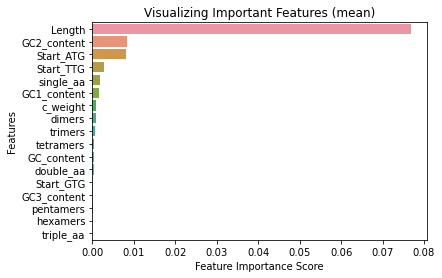

In [76]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = features_red, y = features_red.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (mean)")
#plt.legend(features_red.index, loc ="lower right", fontsize='x-small')
plt.show()

#plt.savefig('feature_imp_g1_agr_mean_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

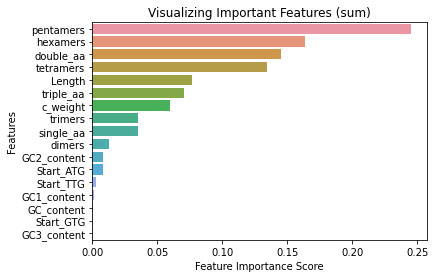

In [77]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = features_red2, y = features_red2.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (sum)")
#plt.legend(features_red.index, loc ="lower right", fontsize='x-small')
plt.show()

#plt.savefig('feature_imp_g1_agr_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

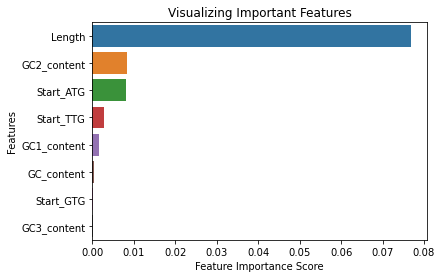

In [78]:
%matplotlib inline

features_condensed = features_condensed.squeeze().sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x = features_condensed, y = features_condensed.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Visualization

In [79]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [80]:
selected = feature_imp.iloc[0:15]

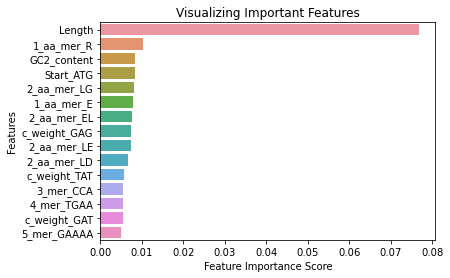

In [81]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = selected, y = selected.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

#plt.savefig('feature_imp_g1_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

## Generating the model on selected features

After removing the least important features the accuracy may increase. This is because one removes misleading data and noise, resulting in increased accuracy. A lesser amount of features also reduces the training time.

In [82]:
selected = feature_imp.iloc[0:200]

In [83]:
selected_feat = list(selected.index)

In [84]:
important_indices = [feature_names.index(x) for x in selected_feat]

In [85]:
# Create a Gaussian Classifier
clf_imp = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                             max_depth=20, bootstrap=False, random_state = 42)

# Select most important features
important_indices = [feature_names.index(x) for x in selected_feat]

train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]

In [86]:
# Train the random forest
clf_imp.fit(train_important, train_y)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [87]:
# Make predictions and determine the error
pred_y = clf_imp.predict(test_important)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
print("Precision score:", metrics.precision_score(test_y, pred_y))
print("Recall score:", metrics.recall_score(test_y, pred_y))
print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.8430769230769231
Precision score: 0.8355321020228672
Recall score: 0.8482142857142857
ROC_AUC score: 0.8431547619047619


#### Confusion matrix

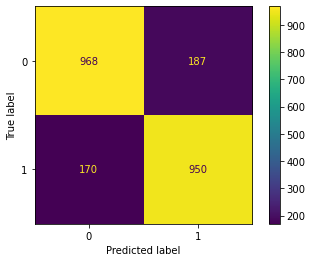

In [88]:
plot_confusion_matrix(clf_imp, test_important, test_y)  
plt.show()

#plt.savefig('confmatrix_g1_bestmod_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

After feature selection based on the most important features the metrics improved by 2%. In the confusion matrix we see that the clf_imp model generates much less false positives and slightly more false negatives. Meaning the accuracy, precision and ROC_AUC scores improve after feature selection and recall decreases slightly. 

## KLADD